In [53]:
import numpy as np
import matplotlib.pyplot as plt

#Import existing datasets from sklearn
from sklearn import datasets
from typing import Dict, List


In [54]:
# X - feature value vectors, y - corresponding target label, 200 data points. If no noise, they form clean moons and easy to classify. (not close to real data) 
X, y = datasets.make_moons(200, noise=0.15)
#X.shape (200, 2)
#y.shape (200)

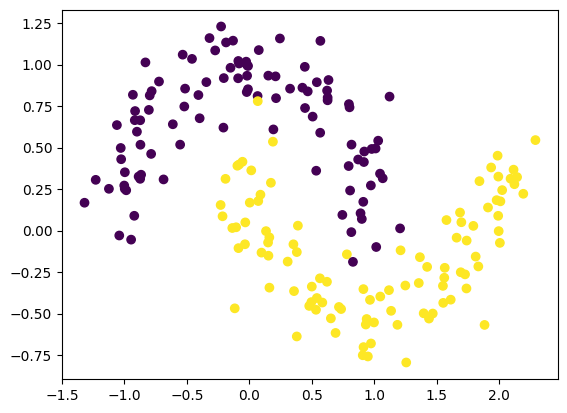

In [55]:
#Visualize the data generated
plt.scatter(X[:,0], X[:,1], c=y)

In [56]:
#Hyperparameters
# 2 features
input_neurons = 2
# 1 if BCE loss and 2 if cross entropy as we use softmax on both. 
output_neurons = 2
samples = X.shape[0]
learning_rate = 0.001
#regularization. Mispelled as to not to override the default lambda functionality in python
lamda = 0.01 

![NN](./7.nn.drawio.png)

In [57]:
#Exactly how a model is represented in pytorch
#model_dict = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

#Weight Retrieval 
def retrieve(model_dict):
    W1 = model_dict['W1']
    b1 = model_dict['b1']
    W2 = model_dict['W2']
    b2 = model_dict['b2']
    return W1, b1, W2, b2


In [58]:
#Forward prop
# ReLU usually used w/ images. For, FFN in this case we can use sigmoid/tanh.
def forward_prop(X, model_dict):
    W1, b1, W2, b2 = retrieve(model_dict)
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)  
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    #Now our output layer has 2 neurons and we apply softmax to get probablities 
    exp_scores = np.exp(a2)
    softmax = exp_scores/np.sum(exp_scores, axis=1, keepdims=True) #Sum across the columns for each sample. 
    return softmax

In [59]:
#Loss function: softmax is the prediction returned by the forward_prop and y are the ground truth labels. Here we use cross-entropy .
#Note: Crossentropy calculates the loss only over the correct labels.
def loss(softmax, y):
    W1, b1, W2, b2 = retrieve(model_dict)
    m = np.zeros(y.shape[0])
    for i,correct_idx in enumerate(y):
        predicted = softmax[i][correct_idx]
        m[i] = predicted
    log_prob = -np.log(predicted) #log probabilties per sample
    softmax_loss = np.sum(log_prob) # all samples
    reg_loss = (lamda/2) *  (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss = softmax_loss + reg_loss
    return float(loss/y.shape[0])


In [60]:
#Prediction
def predict(X, model_dict):
    W1, b1, W2, b2 = retrieve(model_dict)
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)  
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    #Now our output layer has 2 neurons and we apply softmax to get probablities 
    exp_scores = np.exp(a2)
    softmax = exp_scores/np.sum(exp_scores, axis=1, keepdims=True) #Sum across the columns for each sample. 
    return np.argmax(softmax, axis = 1) #200,2 matrix. Need max ACROSS the columns so dim=1. argmax returns the index where the maximum value is. 